In [1]:
!nvidia-smi

Tue Oct 20 23:24:49 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 451.67       Driver Version: 451.67       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1650   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8     1W /  N/A |    132MiB /  4096MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [2]:
import tensorflow as tf

import numpy as np
# import logging
# logger = tf.get_logger()
# logger.setLevel(logging.ERROR)

## Set up Input --> Output

In [4]:
def bmi_calculator(_weight, _height):
    _bmi = _weight/_height**2
    return _bmi

## With Algorithms

In [3]:
weights = [25, 50, 75, 65, 85, 55, 100, 44]
heights = [1.35, 1.42, 1.70, 1.85, 1.90, 1.50, 1.60, 1.50]

In [19]:
bmis = [bmi_calculator(weight, height) for weight, height in zip(weights, heights)]

In [20]:
bmis # Labels

[13.717421124828531,
 24.79666732791113,
 25.95155709342561,
 18.991964937910883,
 23.545706371191137,
 24.444444444444443,
 39.06249999999999,
 19.555555555555557]

In [21]:
features = [[weight, height] for weight, height in zip(weights, heights)]
features

[[25, 1.35],
 [50, 1.42],
 [75, 1.7],
 [65, 1.85],
 [85, 1.9],
 [55, 1.5],
 [100, 1.6],
 [44, 1.5]]

## Create the model

### Build a layer

In [22]:
import tensorflow as tf

In [23]:
layer_1 = tf.keras.layers.Dense(units=1, input_shape=[2])

In [24]:
model = tf.keras.Sequential([layer_1])

**Note**

You will often see the layers defined inside the model definition, rather than beforehand:

```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

## Compile the model, with loss and optimizer functions

In [25]:
model.compile(
                loss= 'mean_squared_error',
                optimizer= tf.keras.optimizers.Adam(0.1)
             )

In [26]:
%%time
history = model.fit(features, bmis, epochs= 500, verbose=False)
print('Finished training the model')

Finished training the model
Wall time: 14.5 s


In [28]:
history.history.keys()

dict_keys(['loss'])

## Display training statistics: Loss vs Epochs

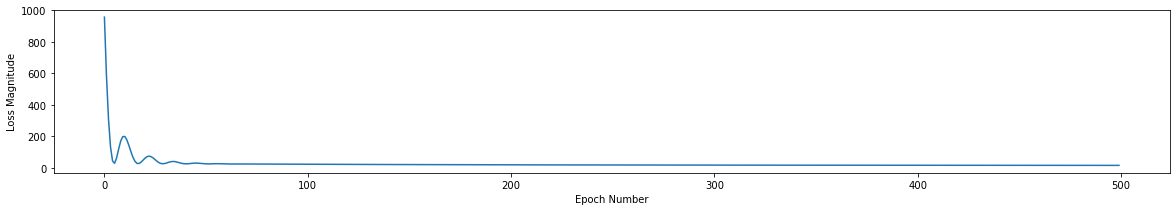

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,3))
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

## Use the model for Inference

In [30]:
model.predict([[75, 1.73]])

In [31]:
result_model = model.predict([[75, 1.73]])[0][0]
result_algorithm = bmi_calculator(75, 1.73)

In [32]:
print(f"Model results: {result_model:.3f} \n Algo results: {result_algorithm:.3f}")

Model results: 27.047 
 Algo results: 25.059


In [33]:
layer_1.get_weights()

[array([[ 0.28570083],
        [-0.65061986]], dtype=float32),
 array([6.7452335], dtype=float32)]

In [34]:
print(f"""Beta weight: {layer_1.get_weights()[0][0][0]:.3f}\
      \nBeta height: {layer_1.get_weights()[0][1][0]:.3f}\
      \nBeta bias: {layer_1.get_weights()[1][0]:.3f}""")

Beta weight: 0.286      
Beta height: -0.651      
Beta bias: 6.745


## ลองเพิ่ม Complexity Model ดู

In [36]:
layer_1 = tf.keras.layers.Dense(units=4, input_shape=[2])
layer_2 = tf.keras.layers.Dense(units=4)
layer_O = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([layer_1, layer_2, layer_O])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(features, bmis, epochs=500, verbose=False)
print("Finished training the model")

result_model = model.predict([[75, 1.73]])[0][0]
result_algorithm = bmi_calculator(75, 1.73)

print(f"Model results: {result_model:.3f} \n Algo results: {result_algorithm:.3f}")

Finished training the model
Model results: 26.825 
 Algo results: 25.059


## Loss ลดลงมานิสนุง จาก 
- 28.466 >> 28.100

## Check สมการที่ได้

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [38]:
print("Layer 1")
layer_1.get_weights()

Layer 1


[array([[-0.04858897, -0.3834268 ,  0.00990842, -0.14657941],
        [ 2.780684  ,  3.542997  , -1.3368133 ,  1.4789737 ]],
       dtype=float32),
 array([-1.7730883, -4.7577047,  1.9029552, -2.1025693], dtype=float32)]

In [39]:
print("Layer 2")
layer_2.get_weights()

Layer 2


[array([[ 0.46846932,  0.3878442 ,  0.3537235 ,  0.12995324],
        [-0.3670715 , -0.01931337, -0.08740711, -0.8087202 ],
        [ 0.6301401 , -1.4072399 , -0.9271675 , -1.0959114 ],
        [-0.16943832,  0.6028884 ,  0.8766038 ,  0.7442259 ]],
       dtype=float32),
 array([-0.03867147,  1.1927637 ,  0.8846212 ,  4.1293554 ], dtype=float32)]

In [40]:
print("Layer Output")
layer_O.get_weights()

Layer Output


[array([[ 0.23760793],
        [-0.60846275],
        [-0.5537691 ],
        [ 0.6991146 ]], dtype=float32),
 array([4.625402], dtype=float32)]